In [2]:
import imageio      #Para leer y guardar imagenes.
import numpy as np  #Operaciones con vectores, matrices, tensores...
import matplotlib.pyplot as plt    #Para realizar graficos.
import matplotlib.image as plti

import warnings     # (Opcional) Es para evitar algunos mensajes de warning.
warnings.filterwarnings('ignore')

from skimage.feature import canny #Para el filtro de bordes (mejor que el sobel del TP 5)

%matplotlib inline 

In [3]:
#Matriz de transformación para YIQ.
M_YIQ = np.array([[0.299, 0.587, 0.114],
                  [0.595716, -0.274453, -0.321263],
                  [0.211456, -0.522591, 0.311135]])

#Matriz de transformación para RGB.
M_RGB = np.array([[1, 0.9563, 0.6210],
                  [1, -0.2721, -0.6474],
                  [1, -1.1070, 1.7046]])

#Función para operaciones con matrices.
def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

#Función simplificada para convertir RGB->YIQ.
def rgb2yiq(img):
    return apply_matrix(img, M_YIQ)

#Función simplificada para convertir YIQ->RGB.
def yiq2rgb(img):
    return apply_matrix(img, M_RGB)

#-----------------------------------------
#Implements a general morphologic operation.
def morph_op(img, se, fcn): #fcn es la funcion que quiero hacer. Por ej -> np.max: Dilatación, np.min: Erosión
    se_flip = np.flip(se, axis=[0,1])
    rk, ck = se_flip.shape
    img_pad = np.pad(img, ((rk//2, rk//2), (ck//2, ck//2)), 'edge')
    img_out = np.zeros(img.shape)
    for r,c in np.ndindex(img.shape):
        img_out[r,c] = fcn(img_pad[r:r+rk,c:c+ck][se_flip])
    return img_out

#-----------------------------------------

def im_dilatacion(img, se):
    return morph_op(img,se,np.max)

def im_erosion(img, se):    
    return morph_op(img,se,np.min)

def im_mediana(img, se):
        return morph_op(img, se, np.median)    
    
#-----------------------------------------

#siguiendo los slides de la materia, menciona que los métodos son de la siguiente manera

#- Borde exterior (dilatación menos original):
#- Borde interior (original menos erosión)
#- Gradiente (dilatación menos erosión)

#con lo cual...

def borde_externo(img, se):
    return (im_dilatacion(img,se) - img)

def borde_interno(img, se):
    return (img - im_erosion(img, se))

def gradiente(img, se):
    return (im_dilatacion(img,se) - im_erosion(img, se))

#-----------------------------------------

#siguiendo los slides de la materia, menciona que los métodos son de la siguiente manera

# Apertura (erosión seguida por dilatación):
# Cierre (dilatación seguida por erosión):
# Top hat (imagen menos apertura):

#con lo cual...
def apertura(img, se):
    return (im_dilatacion(im_erosion(img, se), se)) 

def cierre(img,se):
    return (im_erosion(im_dilatacion(img, se), se)) 
 
def top_hat(img,se):
    return (img-apertura(img, se)) 

def bottom_hat(img,se):
    return (cierre(img, se)-img)

#-----------------------------------------

def OC(img,se):
    return (cierre(apertura(img,se), se)) 

def CO(img,se):
    return (apertura(cierre(img,se), se)) 

#-----------------------------------------

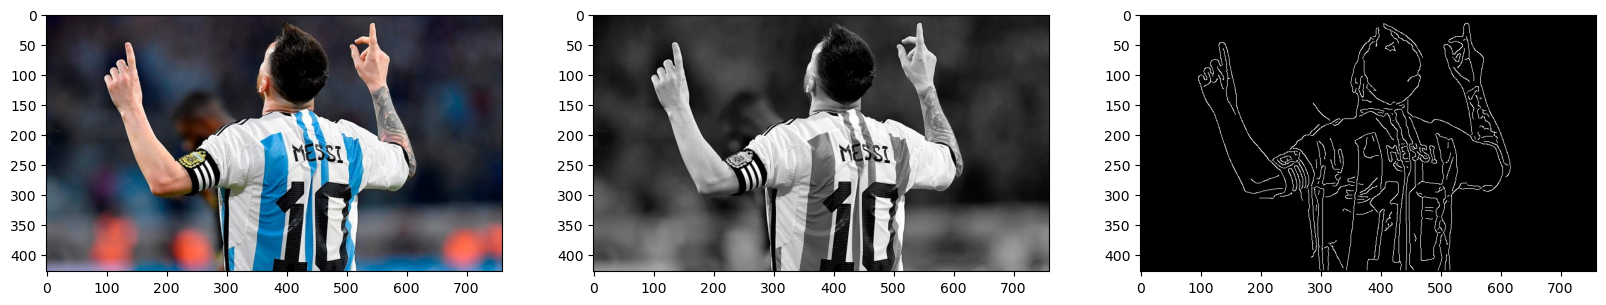

In [5]:
img_rgb  = imageio.imread("img/messi.png")/255    #Imagen RGB
img_yiq = rgb2yiq(img_rgb)
img_gray = img_yiq[:,:,0]                            #Tomo el canal Y
img_bin  = canny(img_gray, sigma=2)                  #Imagen BINARIA

fig, axes = plt.subplots(1, 3, figsize=(20,15))
axes[0].imshow(img_rgb)
axes[1].imshow(img_gray, 'gray')
axes[2].imshow(img_bin, 'gray')

Defino los elementos estructurantes

In [7]:
#Elemento estructurante: BOX
N=3
se_box = np.ones((N,N), dtype=bool)
print(se_box)
print()

se_box7 = np.ones((7,7), dtype=bool)

#Elemento estructurante: CIRCLE
se_circle = np.array([[0,1,0],
                      [1,1,1],
                      [0,1,0]])
se_circle = se_circle > 0
print(se_circle)

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]

[[False  True False]
 [ True  True  True]
 [False  True False]]


NIVEL 1a: Operaciones básicas

Dilatación

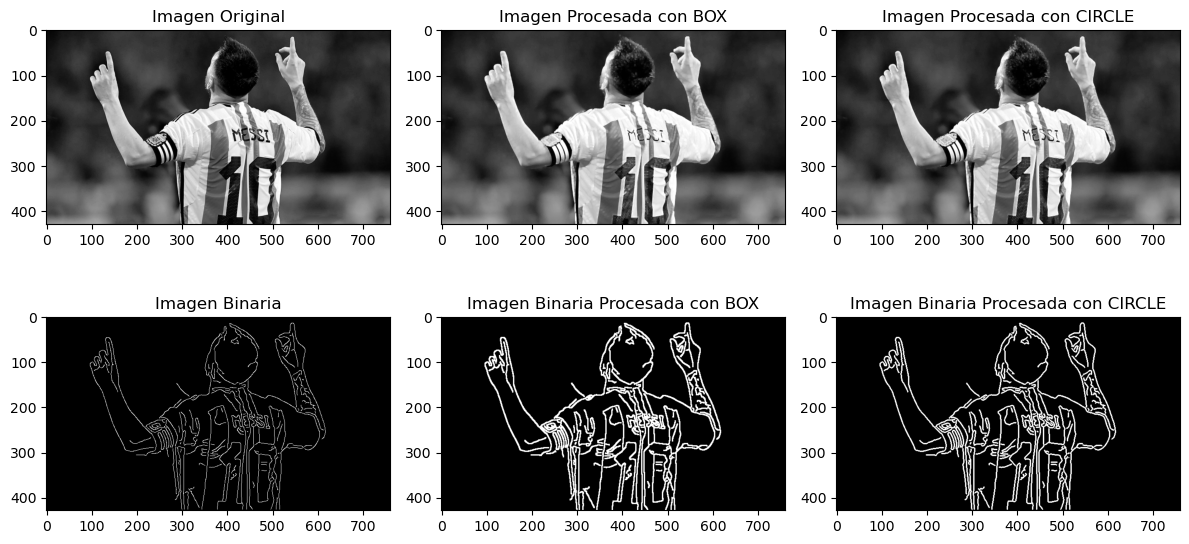

In [8]:
#Utilizando el elemento estructurante BOX

img_gray_proc_dil = im_dilatacion(img_gray, se_box)
img_bin_proc_dil  = im_dilatacion(img_bin,  se_box)

#Utilizando el elemento estructurante CIRCLE

img_gray_proc_circle_dil  =  im_dilatacion(img_gray, se_circle)
img_bin_proc_circle_dil   =  im_dilatacion(img_bin, se_circle)

#ploteo
fig, axes = plt.subplots(2, 3, figsize=(12,6))
axes[0,0].set_title('Imagen Original')
axes[0,1].set_title('Imagen Procesada con BOX')
axes[0,2].set_title('Imagen Procesada con CIRCLE')
axes[0,0].imshow(img_gray, 'gray')
axes[0,1].imshow(img_gray_proc_dil, 'gray')
axes[0,2].imshow(img_gray_proc_circle_dil, 'gray')
axes[1,0].imshow(img_bin, 'gray')
axes[1,1].imshow(img_bin_proc_dil, 'gray')
axes[1,2].imshow(img_bin_proc_circle_dil  , 'gray')
axes[1,0].set_title('Imagen Binaria')
axes[1,1].set_title('Imagen Binaria Procesada con BOX')
axes[1,2].set_title('Imagen Binaria Procesada con CIRCLE')

#para corregir la disposición de cuando te lo muestra, me queda medio raro y lo corrijo con esto.
plt.tight_layout()

Erosión

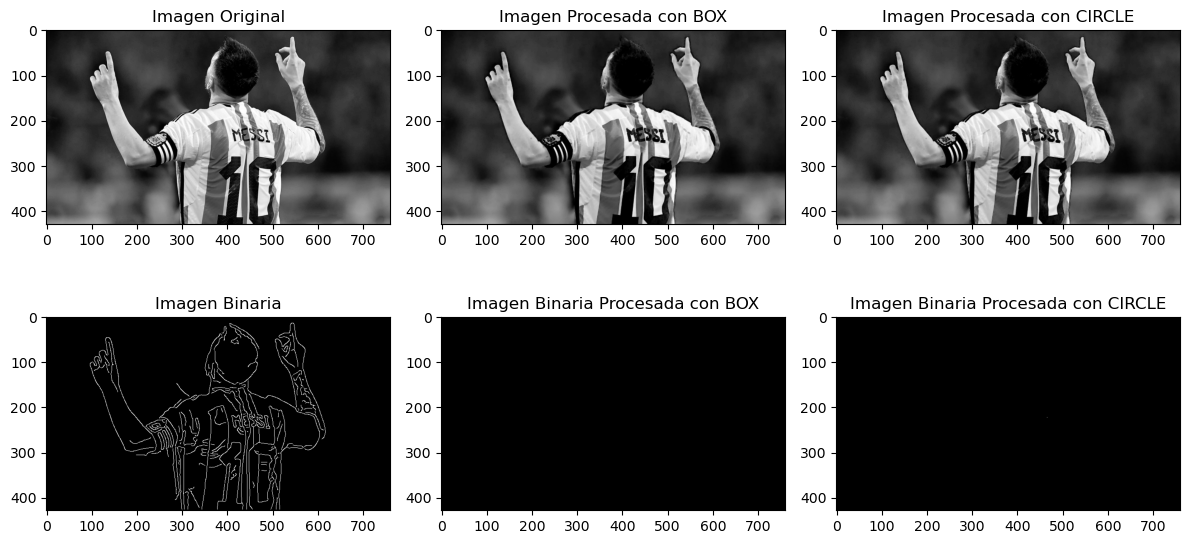

In [9]:
#Utilizando el elemento estructurante BOX

img_gray_proc_ero = im_erosion(img_gray, se_box)
img_bin_proc_ero  = im_erosion(img_bin,  se_box)

#Utilizando el elemento estructurante CIRCLE

img_gray_proc_circle_ero  =  im_erosion(img_gray, se_circle)
img_bin_proc_circle_ero   =  im_erosion(img_bin, se_circle)

#ploteo
fig, axes = plt.subplots(2, 3, figsize=(12,6))
axes[0,0].set_title('Imagen Original')
axes[0,1].set_title('Imagen Procesada con BOX')
axes[0,2].set_title('Imagen Procesada con CIRCLE')
axes[0,0].imshow(img_gray, 'gray')
axes[0,1].imshow(img_gray_proc_ero, 'gray')
axes[0,2].imshow(img_gray_proc_circle_ero, 'gray')
axes[1,0].imshow(img_bin, 'gray')
axes[1,1].imshow(img_bin_proc_ero, 'gray')
axes[1,2].imshow(img_bin_proc_circle_ero  , 'gray')
axes[1,0].set_title('Imagen Binaria')
axes[1,1].set_title('Imagen Binaria Procesada con BOX')
axes[1,2].set_title('Imagen Binaria Procesada con CIRCLE')

#para corregir la disposición de cuando te lo muestra, me queda medio raro y lo corrijo con esto.
plt.tight_layout()

Mediana

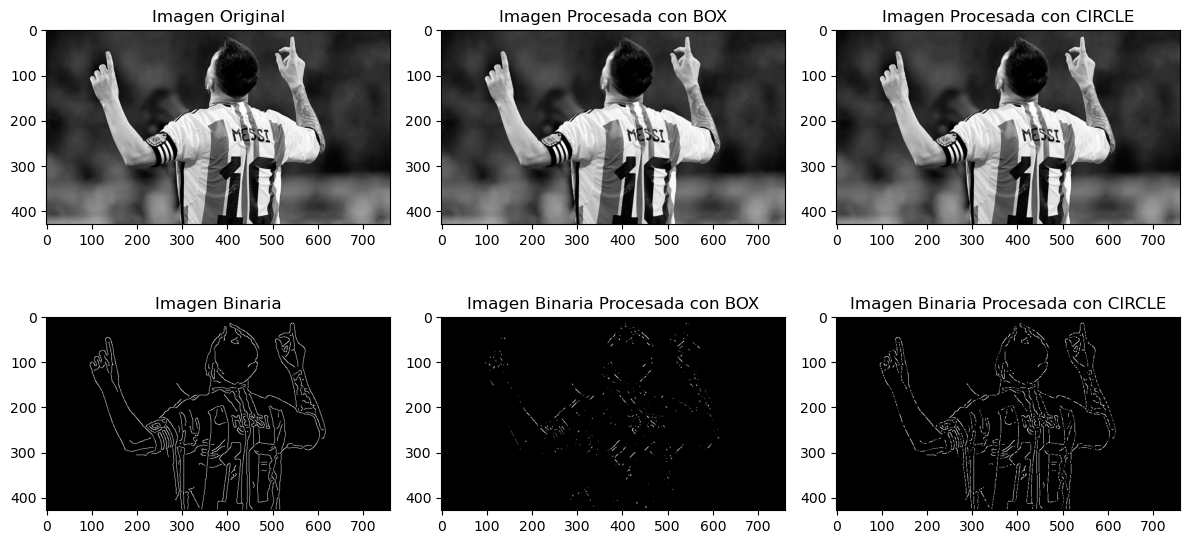

In [10]:
#Utilizando el elemento estructurante BOX

img_gray_proc_med = im_mediana(img_gray, se_box)
img_bin_proc_med  = im_mediana(img_bin,  se_box)

#Utilizando el elemento estructurante CIRCLE

img_gray_proc_circle_med  =  im_mediana(img_gray, se_circle)
img_bin_proc_circle_med  =  im_mediana(img_bin, se_circle)

#ploteo
fig, axes = plt.subplots(2, 3, figsize=(12,6))
axes[0,0].set_title('Imagen Original')
axes[0,1].set_title('Imagen Procesada con BOX')
axes[0,2].set_title('Imagen Procesada con CIRCLE')
axes[0,0].imshow(img_gray, 'gray')
axes[0,1].imshow(img_gray_proc_med, 'gray')
axes[0,2].imshow(img_gray_proc_circle_med, 'gray')
axes[1,0].imshow(img_bin, 'gray')
axes[1,1].imshow(img_bin_proc_med, 'gray')
axes[1,2].imshow(img_bin_proc_circle_med , 'gray')
axes[1,0].set_title('Imagen Binaria')
axes[1,1].set_title('Imagen Binaria Procesada con BOX')
axes[1,2].set_title('Imagen Binaria Procesada con CIRCLE')

#para corregir la disposición de cuando te lo muestra, me queda medio raro y lo corrijo con esto.
plt.tight_layout()

NIVEL 1b: Operaciones de suma/resta entre erosión y dilatación

Borde externo (Dilatacion - imagen)

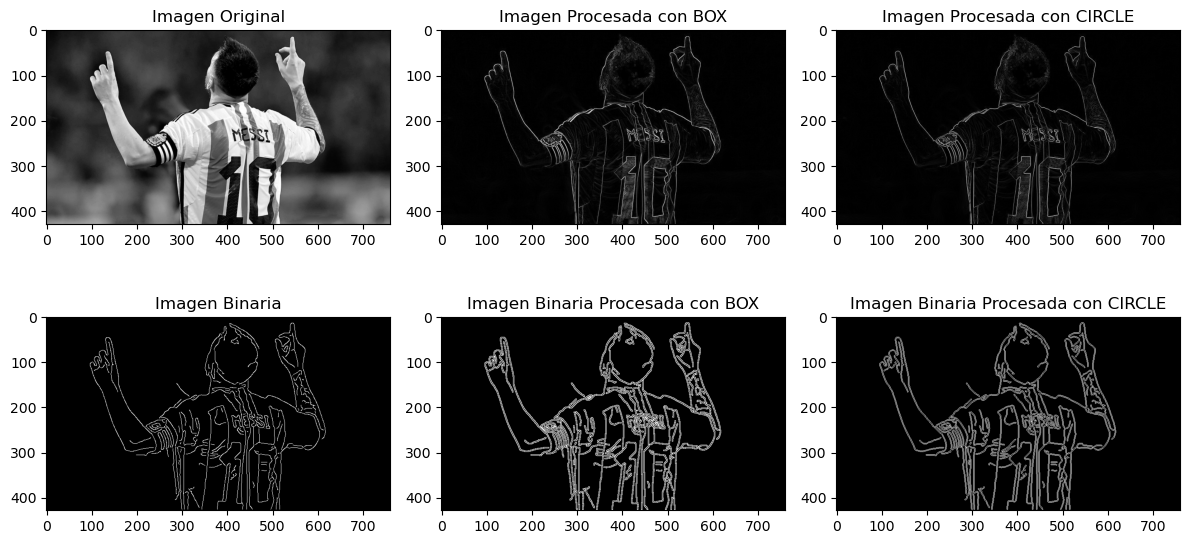

In [11]:
#Utilizando el elemento estructurante BOX

img_gray_be_b = borde_externo(img_gray, se_box)
img_bin_be_b  = borde_externo(img_bin,  se_box)

#Utilizando el elemento estructurante CIRCLE

img_gray_be_c  =  borde_externo(img_gray, se_circle)
img_bin_be_c =  borde_externo(img_bin, se_circle)

#ploteo
fig, axes = plt.subplots(2, 3, figsize=(12,6))
axes[0,0].set_title('Imagen Original')
axes[0,1].set_title('Imagen Procesada con BOX')
axes[0,2].set_title('Imagen Procesada con CIRCLE')
axes[0,0].imshow(img_gray, 'gray')
axes[0,1].imshow(img_gray_be_b, 'gray')
axes[0,2].imshow(img_gray_be_c, 'gray')
axes[1,0].imshow(img_bin, 'gray')
axes[1,1].imshow(img_bin_be_b, 'gray')
axes[1,2].imshow(img_bin_be_c , 'gray')
axes[1,0].set_title('Imagen Binaria')
axes[1,1].set_title('Imagen Binaria Procesada con BOX')
axes[1,2].set_title('Imagen Binaria Procesada con CIRCLE')

#para corregir la disposición de cuando te lo muestra, me queda medio raro y lo corrijo con esto.
plt.tight_layout()

Borde interno (imagen - Erosión)

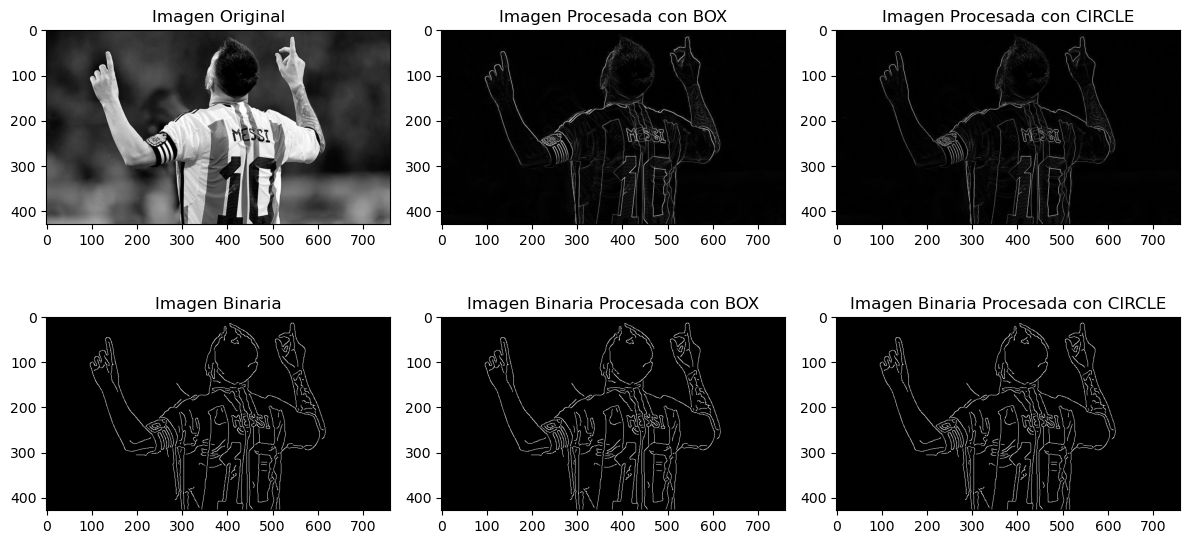

In [12]:
#Utilizando el elemento estructurante BOX

img_gray_bi_b = borde_interno(img_gray, se_box)
img_bin_bi_b  = borde_interno(img_bin,  se_box)

#Utilizando el elemento estructurante CIRCLE

img_gray_bi_c  =  borde_interno(img_gray, se_circle)
img_bin_bi_c =  borde_interno(img_bin, se_circle)

#ploteo
fig, axes = plt.subplots(2, 3, figsize=(12,6))
axes[0,0].set_title('Imagen Original')
axes[0,1].set_title('Imagen Procesada con BOX')
axes[0,2].set_title('Imagen Procesada con CIRCLE')
axes[0,0].imshow(img_gray, 'gray')
axes[0,1].imshow(img_gray_bi_b, 'gray')
axes[0,2].imshow(img_gray_bi_c, 'gray')
axes[1,0].imshow(img_bin, 'gray')
axes[1,1].imshow(img_bin_bi_b, 'gray')
axes[1,2].imshow(img_bin_bi_c , 'gray')
axes[1,0].set_title('Imagen Binaria')
axes[1,1].set_title('Imagen Binaria Procesada con BOX')
axes[1,2].set_title('Imagen Binaria Procesada con CIRCLE')

#para corregir la disposición de cuando te lo muestra, me queda medio raro y lo corrijo con esto.
plt.tight_layout()

Gradiente (Dilatación - Erosión)

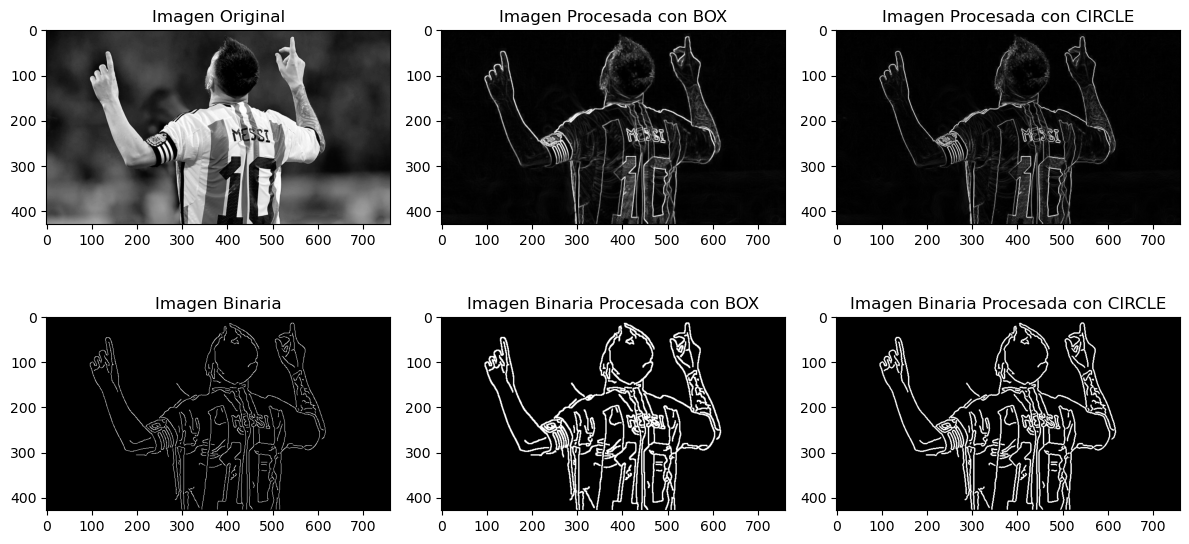

In [13]:
#Utilizando el elemento estructurante BOX

img_gray_g_b = gradiente(img_gray, se_box)
img_bin_g_b  = gradiente(img_bin,  se_box)

#Utilizando el elemento estructurante CIRCLE

img_gray_g_c  =  gradiente(img_gray, se_circle)
img_bin_g_c =  gradiente(img_bin, se_circle)

#ploteo
fig, axes = plt.subplots(2, 3, figsize=(12,6))
axes[0,0].set_title('Imagen Original')
axes[0,1].set_title('Imagen Procesada con BOX')
axes[0,2].set_title('Imagen Procesada con CIRCLE')
axes[0,0].imshow(img_gray, 'gray')
axes[0,1].imshow(img_gray_g_b, 'gray')
axes[0,2].imshow(img_gray_g_c, 'gray')
axes[1,0].imshow(img_bin, 'gray')
axes[1,1].imshow(img_bin_g_b, 'gray')
axes[1,2].imshow(img_bin_g_c , 'gray')
axes[1,0].set_title('Imagen Binaria')
axes[1,1].set_title('Imagen Binaria Procesada con BOX')
axes[1,2].set_title('Imagen Binaria Procesada con CIRCLE')

#para corregir la disposición de cuando te lo muestra, me queda medio raro y lo corrijo con esto.
plt.tight_layout()

NIVEL 2: Operaciones concatenando dilatación y erosión

Apertura

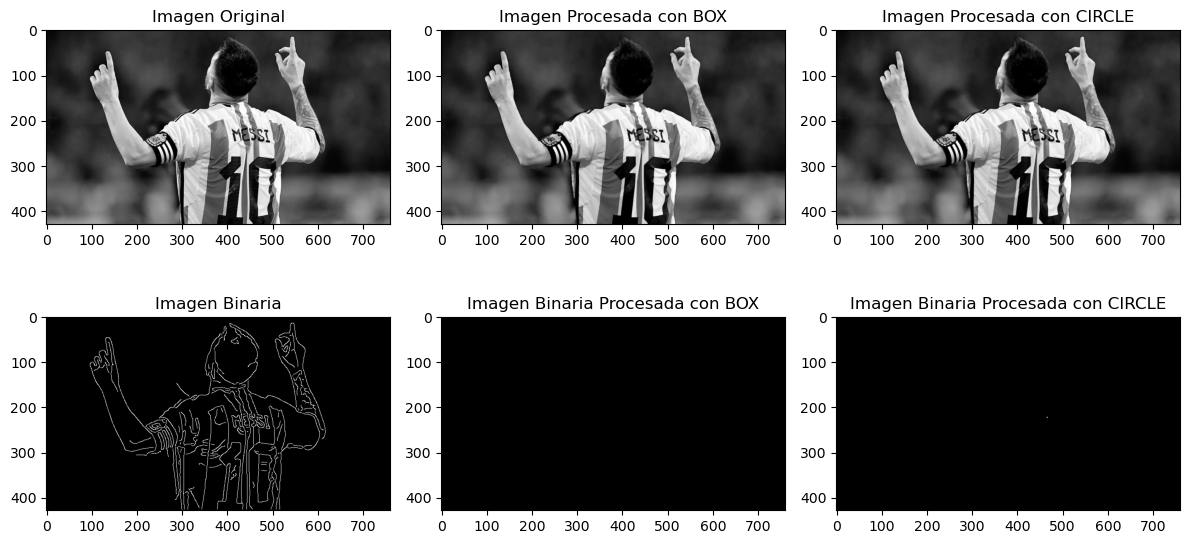

In [14]:
#Utilizando el elemento estructurante BOX

img_gray_ap_b = apertura(img_gray, se_box)
img_bin_ap_b  = apertura(img_bin,  se_box)

#Utilizando el elemento estructurante CIRCLE

img_gray_ap_c  =  apertura(img_gray, se_circle)
img_bin_ap_c =  apertura(img_bin, se_circle)

#ploteo
fig, axes = plt.subplots(2, 3, figsize=(12,6))
axes[0,0].set_title('Imagen Original')
axes[0,1].set_title('Imagen Procesada con BOX')
axes[0,2].set_title('Imagen Procesada con CIRCLE')
axes[0,0].imshow(img_gray, 'gray')
axes[0,1].imshow(img_gray_ap_b, 'gray')
axes[0,2].imshow(img_gray_ap_c, 'gray')
axes[1,0].imshow(img_bin, 'gray')
axes[1,1].imshow(img_bin_ap_b, 'gray')
axes[1,2].imshow(img_bin_ap_c , 'gray')
axes[1,0].set_title('Imagen Binaria')
axes[1,1].set_title('Imagen Binaria Procesada con BOX')
axes[1,2].set_title('Imagen Binaria Procesada con CIRCLE')

#para corregir la disposición de cuando te lo muestra, me queda medio raro y lo corrijo con esto.
plt.tight_layout()

Cierre

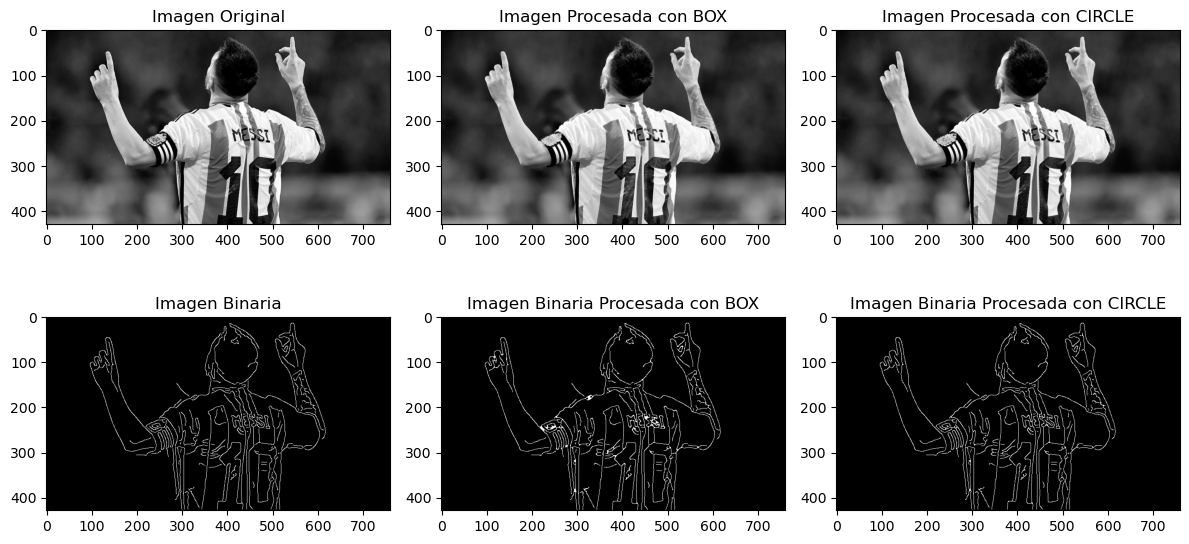

In [15]:
#Utilizando el elemento estructurante BOX

img_gray_c_b = cierre(img_gray, se_box)
img_bin_c_b  = cierre(img_bin,  se_box)

#Utilizando el elemento estructurante CIRCLE

img_gray_c_c  =  cierre(img_gray, se_circle)
img_bin_c_c =  cierre(img_bin, se_circle)

#ploteo
fig, axes = plt.subplots(2, 3, figsize=(12,6))
axes[0,0].set_title('Imagen Original')
axes[0,1].set_title('Imagen Procesada con BOX')
axes[0,2].set_title('Imagen Procesada con CIRCLE')
axes[0,0].imshow(img_gray, 'gray')
axes[0,1].imshow(img_gray_c_b, 'gray')
axes[0,2].imshow(img_gray_c_c, 'gray')
axes[1,0].imshow(img_bin, 'gray')
axes[1,1].imshow(img_bin_c_b, 'gray')
axes[1,2].imshow(img_bin_c_c , 'gray')
axes[1,0].set_title('Imagen Binaria')
axes[1,1].set_title('Imagen Binaria Procesada con BOX')
axes[1,2].set_title('Imagen Binaria Procesada con CIRCLE')

#para corregir la disposición de cuando te lo muestra, me queda medio raro y lo corrijo con esto.
plt.tight_layout()

Top Hat

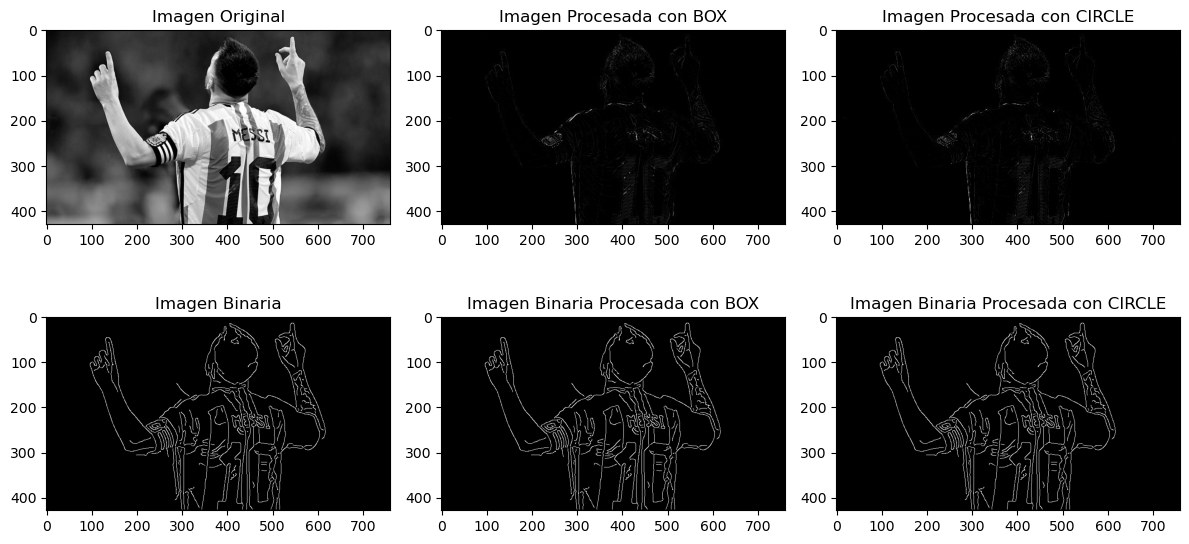

In [16]:
#Utilizando el elemento estructurante BOX

img_gray_th_b = top_hat(img_gray, se_box)
img_bin_th_b  = top_hat(img_bin,  se_box)

#Utilizando el elemento estructurante CIRCLE

img_gray_th_c  =  top_hat(img_gray, se_circle)
img_bin_th_c =  top_hat(img_bin, se_circle)

#ploteo
fig, axes = plt.subplots(2, 3, figsize=(12,6))
axes[0,0].set_title('Imagen Original')
axes[0,1].set_title('Imagen Procesada con BOX')
axes[0,2].set_title('Imagen Procesada con CIRCLE')
axes[0,0].imshow(img_gray, 'gray')
axes[0,1].imshow(img_gray_th_b, 'gray')
axes[0,2].imshow(img_gray_th_c, 'gray')
axes[1,0].imshow(img_bin, 'gray')
axes[1,1].imshow(img_bin_th_b, 'gray')
axes[1,2].imshow(img_bin_th_c , 'gray')
axes[1,0].set_title('Imagen Binaria')
axes[1,1].set_title('Imagen Binaria Procesada con BOX')
axes[1,2].set_title('Imagen Binaria Procesada con CIRCLE')

#para corregir la disposición de cuando te lo muestra, me queda medio raro y lo corrijo con esto.
plt.tight_layout()

Bottom hat

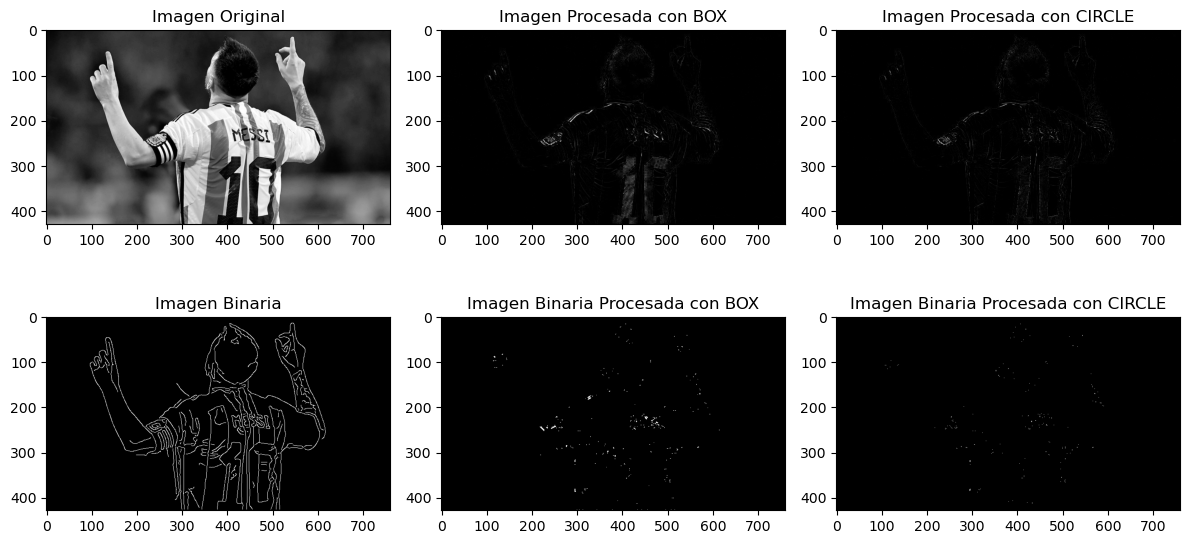

In [17]:
#Utilizando el elemento estructurante BOX

img_gray_bh_b = bottom_hat(img_gray, se_box)
img_bin_bh_b  = bottom_hat(img_bin,  se_box)

#Utilizando el elemento estructurante CIRCLE

img_gray_bh_c  =  bottom_hat(img_gray, se_circle)
img_bin_bh_c =  bottom_hat(img_bin, se_circle)

#ploteo
fig, axes = plt.subplots(2, 3, figsize=(12,6))
axes[0,0].set_title('Imagen Original')
axes[0,1].set_title('Imagen Procesada con BOX')
axes[0,2].set_title('Imagen Procesada con CIRCLE')
axes[0,0].imshow(img_gray, 'gray')
axes[0,1].imshow(img_gray_bh_b, 'gray')
axes[0,2].imshow(img_gray_bh_c, 'gray')
axes[1,0].imshow(img_bin, 'gray')
axes[1,1].imshow(img_bin_bh_b, 'gray')
axes[1,2].imshow(img_bin_bh_c , 'gray')
axes[1,0].set_title('Imagen Binaria')
axes[1,1].set_title('Imagen Binaria Procesada con BOX')
axes[1,2].set_title('Imagen Binaria Procesada con CIRCLE')

#para corregir la disposición de cuando te lo muestra, me queda medio raro y lo corrijo con esto.
plt.tight_layout()

NIVEL 3: Operaciones concatenando cierre y apertura

OC

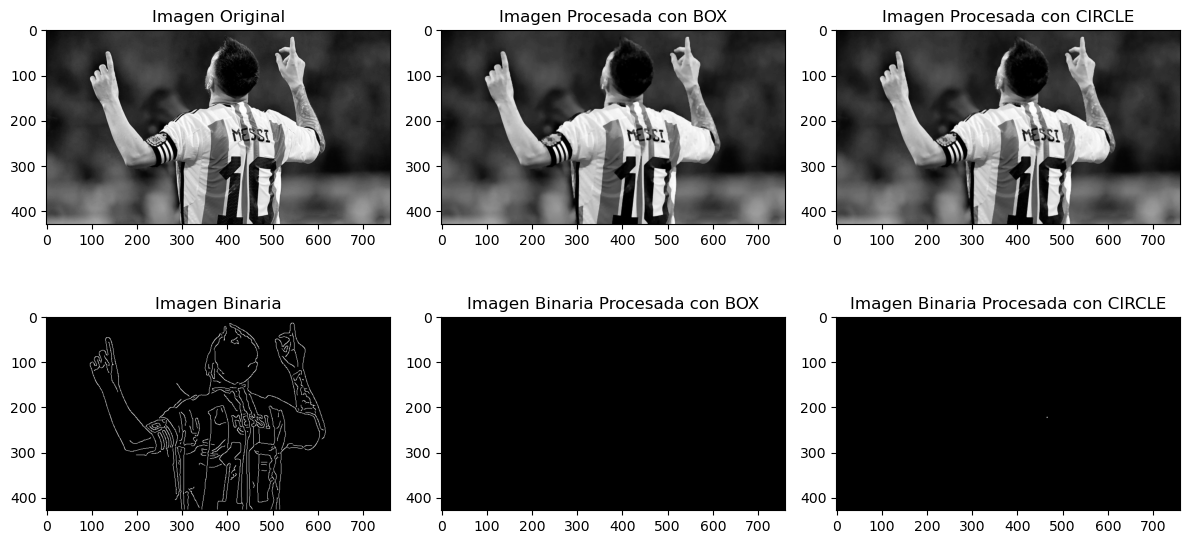

In [18]:
#Utilizando el elemento estructurante BOX

img_gray_oc_b = OC(img_gray, se_box)
img_bin_oc_b  = OC(img_bin,  se_box)

#Utilizando el elemento estructurante CIRCLE

img_gray_oc_c  =  OC(img_gray, se_circle)
img_bin_oc_c =  OC(img_bin, se_circle)

#ploteo
fig, axes = plt.subplots(2, 3, figsize=(12,6))
axes[0,0].set_title('Imagen Original')
axes[0,1].set_title('Imagen Procesada con BOX')
axes[0,2].set_title('Imagen Procesada con CIRCLE')
axes[0,0].imshow(img_gray, 'gray')
axes[0,1].imshow(img_gray_oc_b, 'gray')
axes[0,2].imshow(img_gray_oc_c, 'gray')
axes[1,0].imshow(img_bin, 'gray')
axes[1,1].imshow(img_bin_oc_b, 'gray')
axes[1,2].imshow(img_bin_oc_c , 'gray')
axes[1,0].set_title('Imagen Binaria')
axes[1,1].set_title('Imagen Binaria Procesada con BOX')
axes[1,2].set_title('Imagen Binaria Procesada con CIRCLE')

#para corregir la disposición de cuando te lo muestra, me queda medio raro y lo corrijo con esto.
plt.tight_layout()

CO

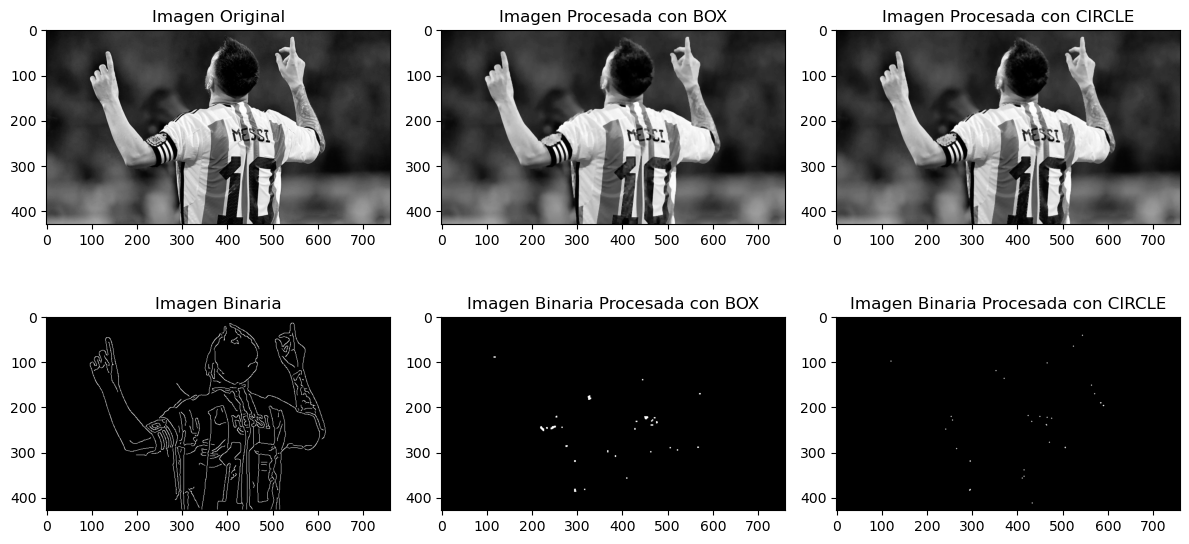

In [19]:
#Utilizando el elemento estructurante BOX

img_gray_co_b = CO(img_gray, se_box)
img_bin_co_b  = CO(img_bin,  se_box)

#Utilizando el elemento estructurante CIRCLE

img_gray_co_c  =  CO(img_gray, se_circle)
img_bin_co_c =  CO(img_bin, se_circle)

#ploteo
fig, axes = plt.subplots(2, 3, figsize=(12,6))
axes[0,0].set_title('Imagen Original')
axes[0,1].set_title('Imagen Procesada con BOX')
axes[0,2].set_title('Imagen Procesada con CIRCLE')
axes[0,0].imshow(img_gray, 'gray')
axes[0,1].imshow(img_gray_co_b, 'gray')
axes[0,2].imshow(img_gray_co_c, 'gray')
axes[1,0].imshow(img_bin, 'gray')
axes[1,1].imshow(img_bin_co_b, 'gray')
axes[1,2].imshow(img_bin_co_c , 'gray')
axes[1,0].set_title('Imagen Binaria')
axes[1,1].set_title('Imagen Binaria Procesada con BOX')
axes[1,2].set_title('Imagen Binaria Procesada con CIRCLE')

#para corregir la disposición de cuando te lo muestra, me queda medio raro y lo corrijo con esto.
plt.tight_layout()

EXTRA:
Segmentación del iris del ojo

Solucioné unos errores de la IMG original de iris. Quería corroborar de que estaba todo en orden, se hace la segmentacion en el 
siguiente paso

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


La forma de la imagen iris es:  (224, 255, 3)


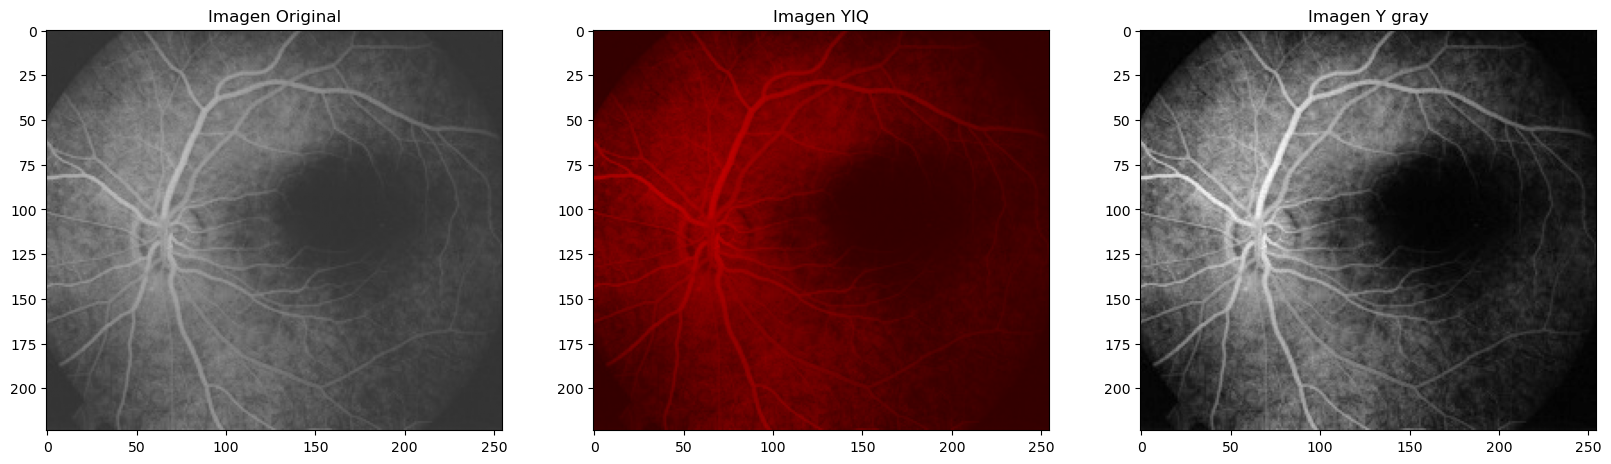

In [20]:
iris  = imageio.imread("img/iris_jpg.jpg")/255    #Imagen RGB

print('La forma de la imagen iris es: ',iris.shape)

iris_yiq = rgb2yiq(iris)
iris_gray = iris_yiq[:,:,0]                            #Tomo el canal Y

fig, axes = plt.subplots(1, 3, figsize=(20,15))
axes[0].set_title('Imagen Original')
axes[1].set_title('Imagen YIQ')
axes[2].set_title('Imagen Y gray')
axes[0].imshow(iris)
axes[1].imshow(iris_yiq, 'gray')
axes[2].imshow(iris_gray, 'gray')

#Esto es solo porque tuve problemas con cargar la imagen del iris, creo que tenía un canal de más la imagen original
#que nos dio la cátedra, con lo cual tenía problemas para realizarle operaciones hasta incluso pasarla a YIQ.
#ya está solucionado

Segmentación del iris del ojo

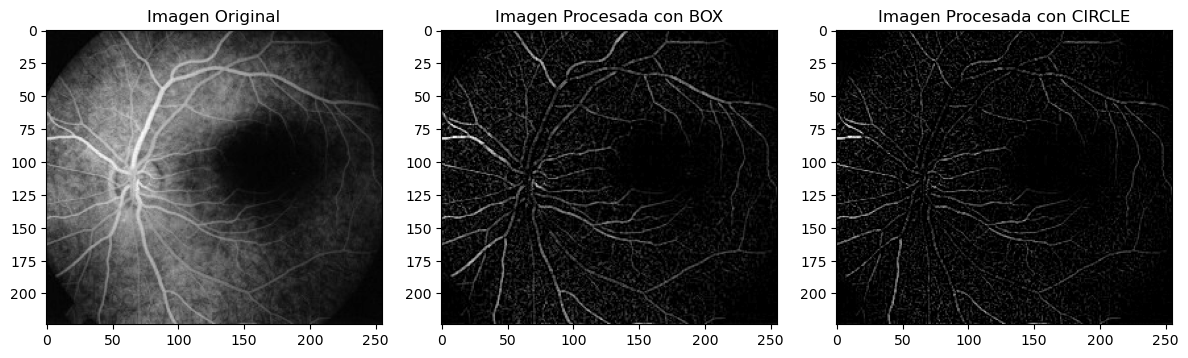

In [21]:
#utilicé este método porque en los slides de la clase creo que utiliza esto.
#Utilizando el elemento estructurante BOX

#Utilizando el elemento estructurante BOX

iris_gray_th_b = top_hat(iris_gray, se_box)

#Utilizando el elemento estructurante CIRCLE

iris_gray_th_c  =  top_hat(iris_gray, se_circle)

#ploteo
fig, axes = plt.subplots(1, 3, figsize=(12,6))
axes[0].set_title('Imagen Original')
axes[1].set_title('Imagen Procesada con BOX')
axes[2].set_title('Imagen Procesada con CIRCLE')
axes[0].imshow(iris_gray, 'gray')
axes[1].imshow(iris_gray_th_b, 'gray')
axes[2].imshow(iris_gray_th_c, 'gray')


#para corregir la disposición de cuando te lo muestra, me queda medio raro y lo corrijo con esto.
plt.tight_layout()

EXTRA: Extracción de texto

Simil con el iris, tenía un canal de más la img y tuve que solucionarlo, y este bloque es para probar si estaba 
todo en orden :D

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


La forma de la imagen texto es:  (250, 478, 3)


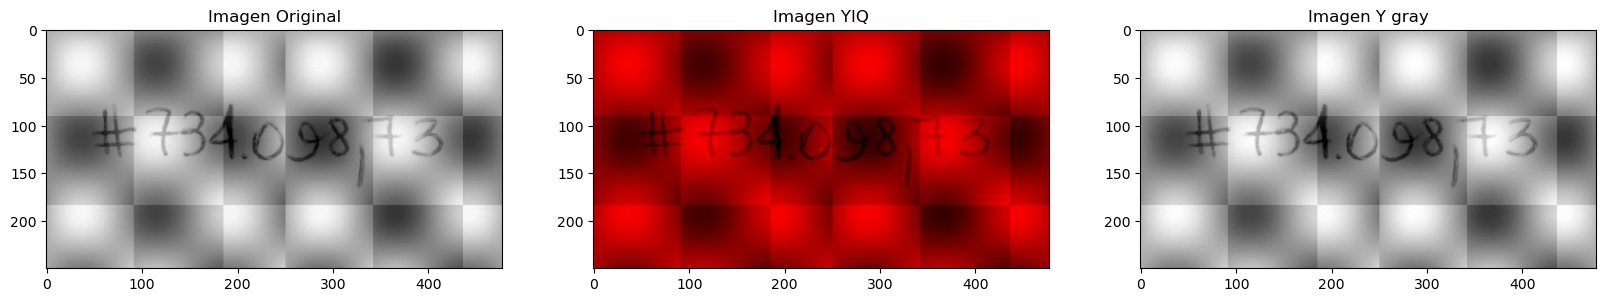

In [24]:
texto  = imageio.imread("img/texto_jpg.jpg")/255    #Imagen RGB

print('La forma de la imagen texto es: ',texto.shape)

texto_yiq = rgb2yiq(texto)
texto_gray = texto_yiq[:,:,0]                            #Tomo el canal Y

fig, axes = plt.subplots(1, 3, figsize=(20,15))
axes[0].set_title('Imagen Original')
axes[1].set_title('Imagen YIQ')
axes[2].set_title('Imagen Y gray')
axes[0].imshow(texto)
axes[1].imshow(texto_yiq, 'gray')
axes[2].imshow(texto_gray, 'gray')

#Esto es solo porque tuve problemas con cargar la imagen del iris, creo que tenía un canal de más la imagen original
#que nos dio la cátedra, con lo cual tenía problemas para realizarle operaciones hasta incluso pasarla a YIQ.
#ya está solucionado

Extraccion de texto

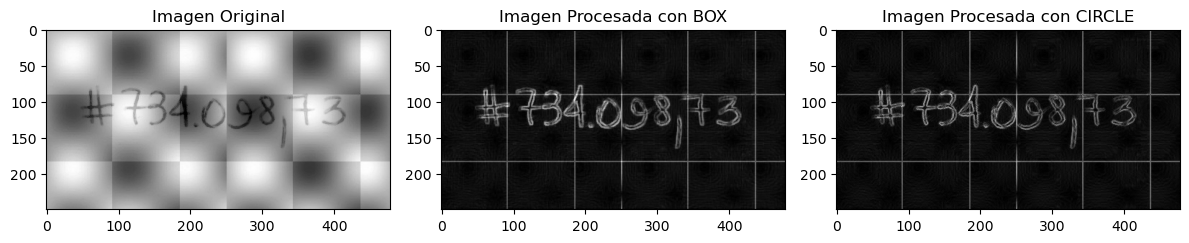

In [25]:
#Utilizando el elemento estructurante BOX

texto_gray_g_b = gradiente(texto_gray, se_box)


#Utilizando el elemento estructurante CIRCLE

texto_gray_g_c  =  gradiente(texto_gray, se_circle)


#ploteo
fig, axes = plt.subplots(1, 3, figsize=(12,6))
axes[0].set_title('Imagen Original')
axes[1].set_title('Imagen Procesada con BOX')
axes[2].set_title('Imagen Procesada con CIRCLE')
axes[0].imshow(texto_gray, 'gray')
axes[1].imshow(texto_gray_g_b, 'gray')
axes[2].imshow(texto_gray_g_c, 'gray')

#para corregir la disposición de cuando te lo muestra, me queda medio raro y lo corrijo con esto.
plt.tight_layout()
